# Análise do Desenvolvimento Humano e Econômico Global

**Dataset:** 
- Gapminder (gapminder_full.cvs)
- Emissão de Co2 (co-emissions-per-capita.csv)

**Autores:**
- Gabriel Moscatel Fevrier 
- Carlos Eduardo Campos Penido
- Marcelo Rodrigues Ribeiro
- Ana Maria Moreira

---

## Introdução

Este notebook apresenta uma análise exploratória e interpretativa sobre o desenvolvimento humano e econômico global, com base no dataset Gapminder. 

O objetivo é investigar padrões temporais e espaciais das variáveis **expectativa de vida (lifeExp)**, **PIB per capita (gdpPercap)** e **população (pop)**, considerando a distribuição por continentes e por país ao longo do período de 1952 a 2007. Além disso realizar uma corelação entre a emissão de co2. **co2_per_capita**

As etapas incluem coleta, limpeza, visualizações, funções reutilizáveis, interpretações críticas e síntese de insights.

---

## 1. Coleta e carregamento dos dados

Carregamento do arquivo `gapminder_full.csv`, `co-emissions-per-capita.csv` e uma visão geral dos dados e tipos de dados.

In [1]:
# Carregamento das bibliotecas
import pandas as pd

# Carregamento do dataset bruto
ds_bruto = pd.read_csv('../datasets/gapminder_full.csv')
ds_bruto_co2 = pd.read_csv('../datasets/co-emissions-per-capita.csv')

# Exibição das primeiras linhas do dataset
display(ds_bruto.head())
display(ds_bruto_co2.head())

# Exibição das informações do dataset
display(ds_bruto.info())
display(ds_bruto_co2.info())

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1736 non-null   object 
 1   year       1736 non-null   int64  
 2   pop        1736 non-null   float64
 3   continent  1736 non-null   object 
 4   lifeExp    1736 non-null   float64
 5   gdpPercap  1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26278 entries, 0 to 26277
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             26278 non-null  object 
 1   Code                               22991 non-null  object 
 2   Year                               26278 non-null  int64  
 3   Annual CO₂ emissions (per capita)  26278 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 821.3+ KB


None

## 2. Limpeza de dados

Remoção de valores nulos e duplicados

Unificação dos dataframes


In [2]:
# Limpeza do dataset (remoção de valores nulos e duplicados)
ds_limpo = ds_bruto.dropna().drop_duplicates().copy()
ds_limpo_co2 = ds_bruto_co2.dropna().drop_duplicates().copy()

# Padronizar nomes de colunas
ds_limpo_co2 = ds_limpo_co2.rename(columns={
    'Entity': 'country',
    'Year': 'year',
    'Annual CO₂ emissions (per capita)': 'co2_per_capita'
})

# Remover países ou anos ausentes
ds_limpo_co2 = ds_limpo_co2.dropna(subset=['country', 'year', 'co2_per_capita'])

# Juntar com o dataframe principal do Gapminder
ds_limpo = ds_limpo.merge(ds_limpo_co2[['country', 'year', 'co2_per_capita']], on=['country', 'year'], how='inner')

# Exibição das primeiras linhas do dataset limpo e unido
print("Dimensões após merge:", ds_limpo.shape)
display(ds_limpo.head())

Dimensões após merge: (1521, 7)


,country,year,pop,continent,lifeExp,gdpPercap,co2_per_capita
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,0.011468
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,0.034130
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,0.073220
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,0.122013
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,0.129103


## 3. Análise exploratória inicial

Estatísticas descritivas das variáveis numéricas e observação da distribuição geral.

In [3]:
# Estatísticas descritivas
display(ds_limpo.describe().round(3))

# Distribuição por continente e anos disponíveis
print('\nContinentes presentes:', ds_limpo['continent'].unique())
print('Anos presentes (min, max):', ds_limpo['year'].min(), ds_limpo['year'].max())

,year,pop,lifeExp,gdpPercap,co2_per_capita
count,1521.000,1.521000e+03,1521.000,1521.000,1521.000
mean,1979.863,3.214751e+07,59.635,7421.187,3.356
std,17.225,1.120175e+08,12.907,10174.686,4.926
min,1952.000,6.001100e+04,23.599,299.850,0.000
25%,1967.000,3.080153e+06,48.357,1201.637,0.216
50%,1982.000,7.578903e+06,61.210,3540.652,1.122
75%,1997.000,2.077570e+07,70.930,9534.677,5.022
max,2007.000,1.318683e+09,82.603,113523.133,40.472



Continentes presentes: ['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
Anos presentes (min, max): 1952 2007


## 4. Funções reutilizáveis para visualizações

Importação da biblioteca de gráficos

In [4]:
# Importação das bibliotecas do sistema
import sys
import os
import matplotlib.pyplot as plt

# Adiciona o diretório pai ao sys.path para importar libs
sys.path.append(os.path.dirname(os.getcwd()))

#Importação da biblioteca de gráficos
import libs.graficos_lib as graficos

## 5. Análises e visualizações

A seguir apresentam-se diversas análises quantitativas e visuais, cada qual com uma breve interpretação.

### Análise 1 — Tendência temporal global da expectativa de vida

Calcula-se a média global de expectativa de vida por ano e plota-se a série temporal.

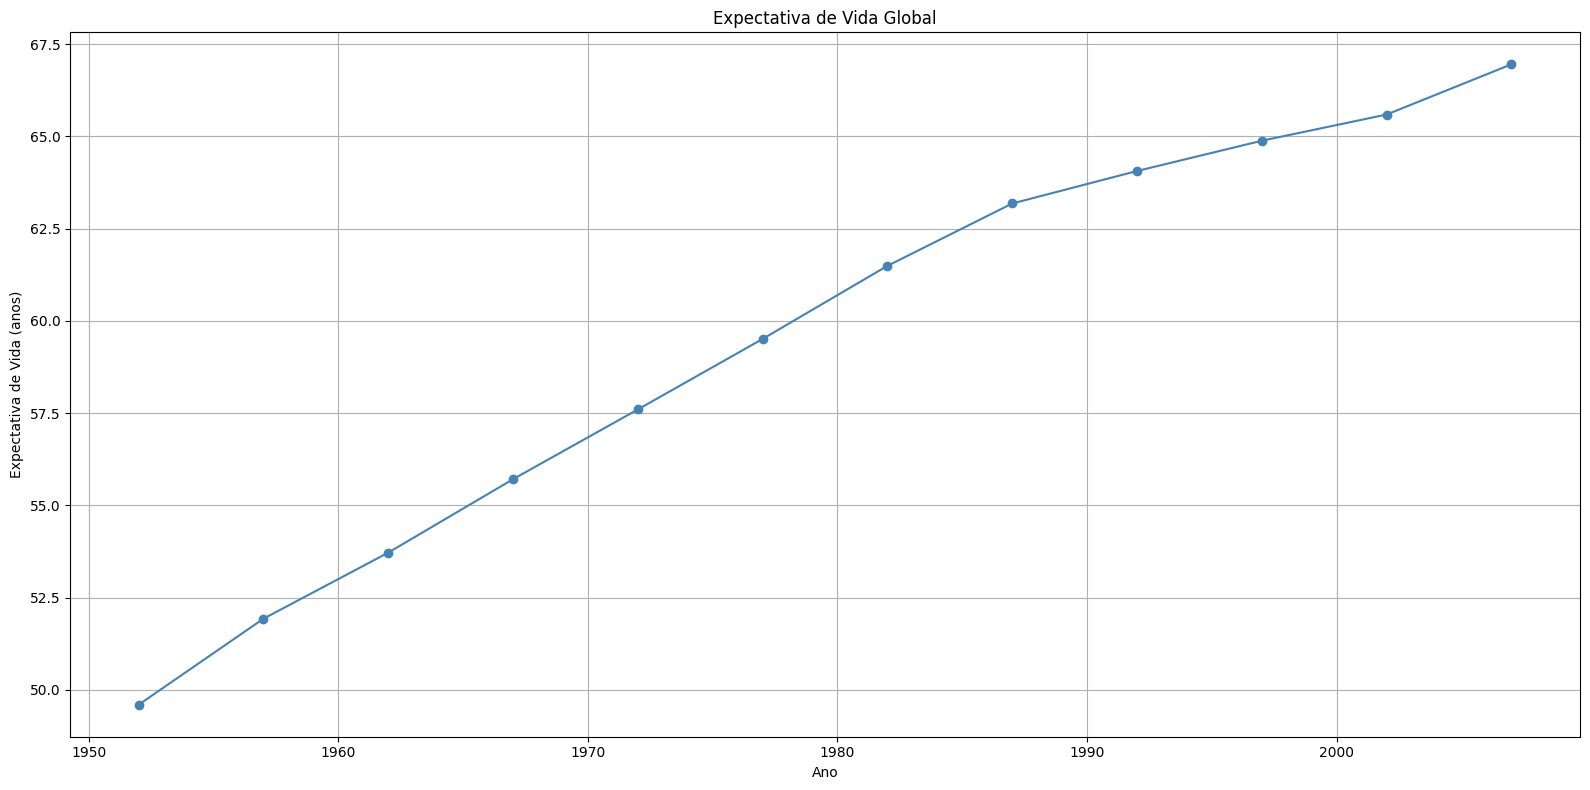

Interpretação: Observa-se um aumento consistente da expectativa de vida média global entre 1952 e 2007, refletindo avanços em saúde pública e nutrição.


In [5]:
# Cálculo da expectativa de vida média por ano
# Agrupamento por ano, cálculo da média da expectativa de vida, reset do índice, ordenação por ano e arredondamento para 2 casas decimais
ds_espec_global = ds_limpo.groupby('year')['lifeExp'].mean().reset_index().sort_values('year').round({'lifeExp': 2})

#Plotagem do gráfico de linhas mostrando a expectativa de vida global ao longo dos anos
graficos.plotar_grafico_linhas(ds_espec_global, 'year', 'lifeExp', None, 'Expectativa de Vida Global', 'Ano', 'Expectativa de Vida (anos)')

print('Interpretação: Observa-se um aumento consistente da expectativa de vida média global entre 1952 e 2007, refletindo avanços em saúde pública e nutrição.')

### Análise 2 — Tendência temporal global do PIB per capita (média)

Média do PIB por ano e representação da série temporal.

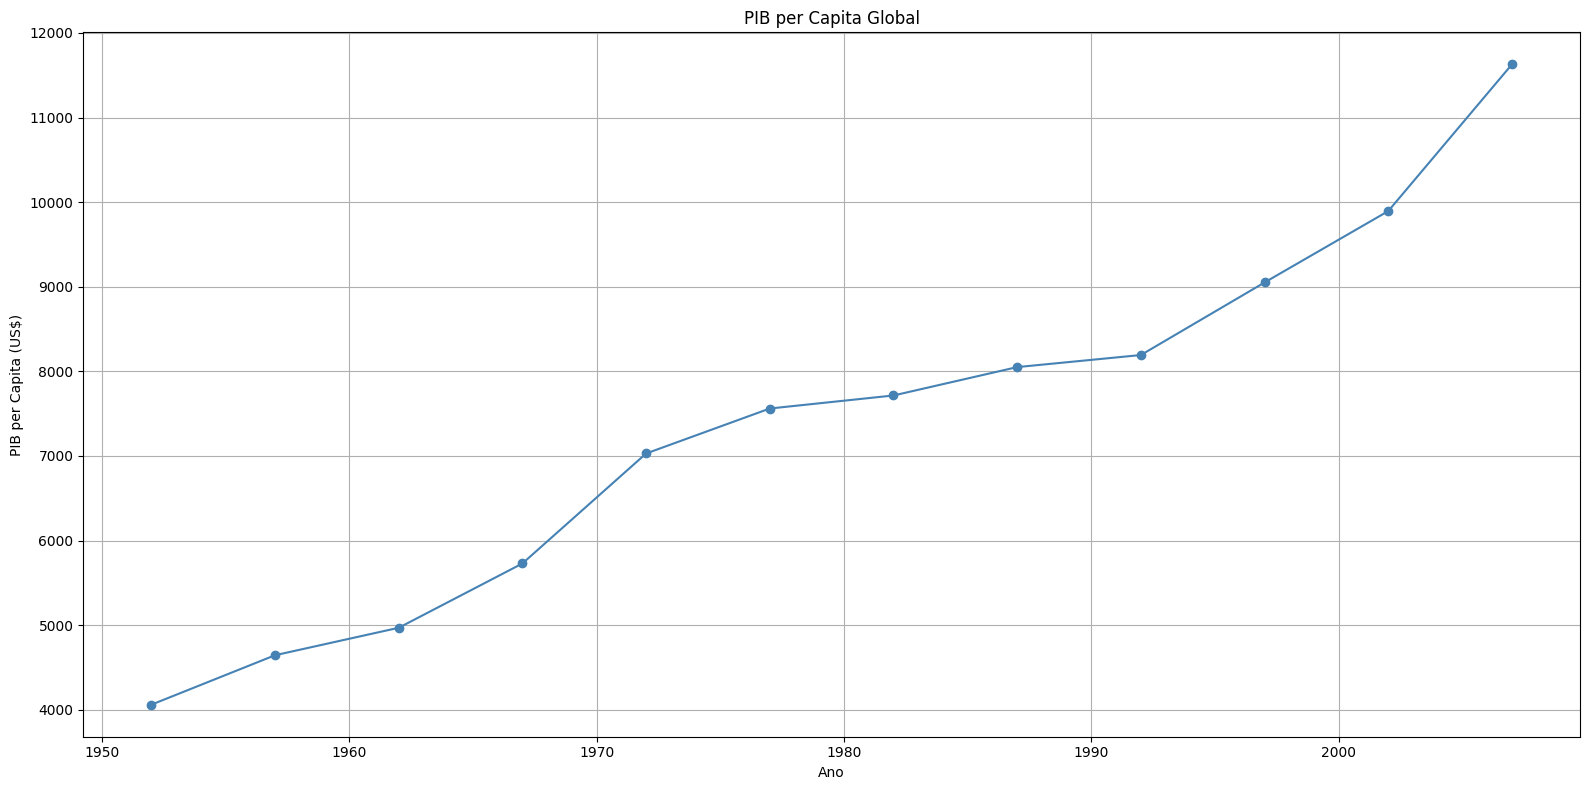

Interpretação: A média do PIB per capita apresenta crescimento.


In [6]:
# Cálculo do PIB per capita médio por ano
ds_pib_global = ds_limpo.groupby('year')['gdpPercap'].mean().reset_index()

#Plotagem do gráfico de linhas mostrando o PIB per capita global ao longo dos anos
graficos.plotar_grafico_linhas(ds_pib_global, 'year', 'gdpPercap', None, 'PIB per Capita Global', 'Ano', 'PIB per Capita (US$)')  

#Interpretação
print('Interpretação: A média do PIB per capita apresenta crescimento.')

### Análise 3 — Evolução populacional global

Soma da população por ano e sua evolução.

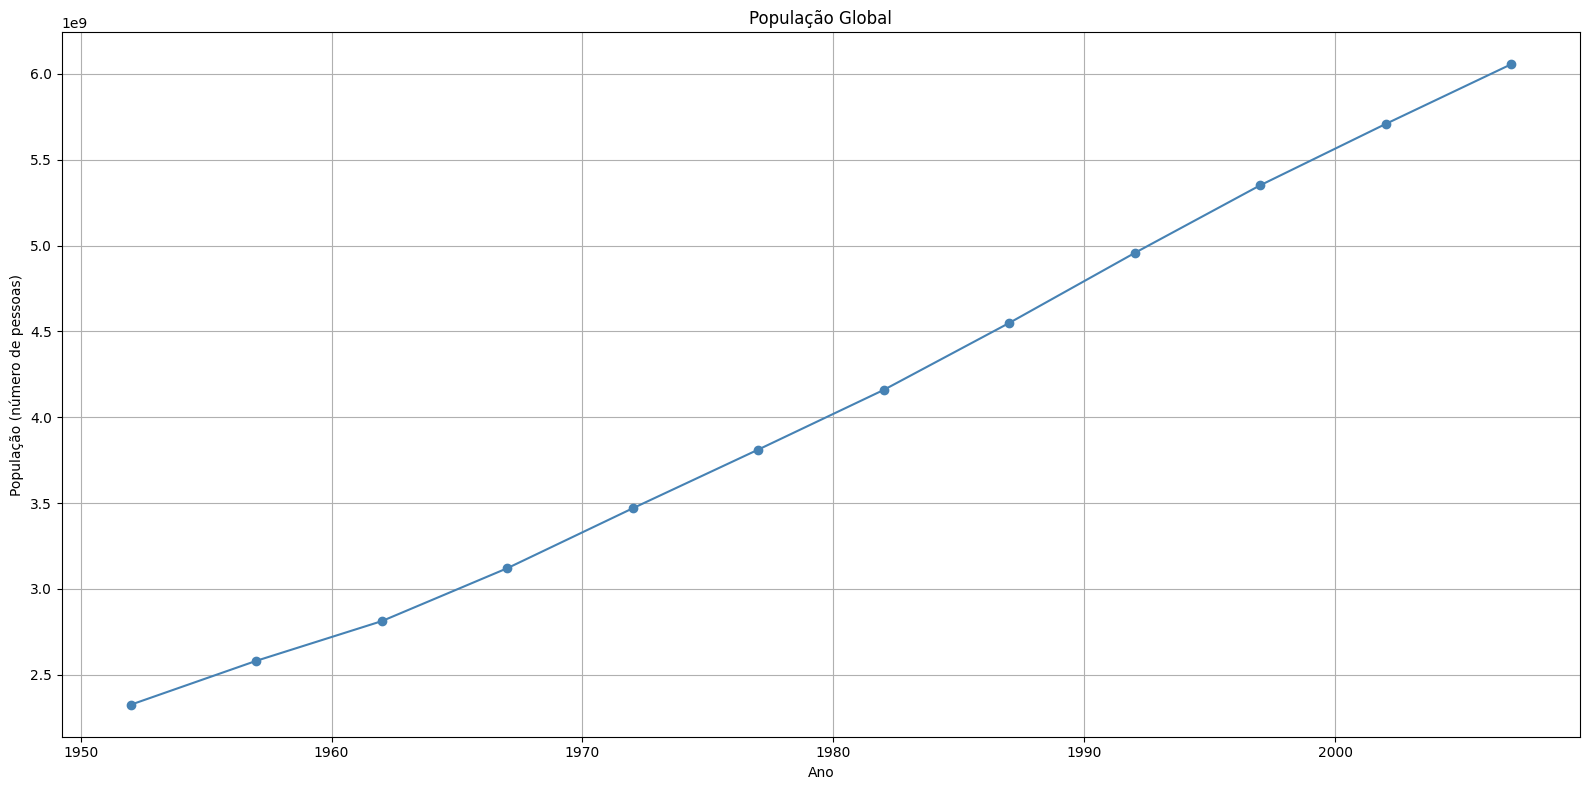

Interpretação: Verifica-se um aumento substancial da população global ao longo do período.


In [7]:
# Cálculo da população total por ano
ds_pop_global = ds_limpo.groupby('year')['pop'].sum().reset_index()

#Plotagem do gráfico de linhas mostrando a população global ao longo dos anos
graficos.plotar_grafico_linhas(ds_pop_global, 'year', 'pop', None, 'População Global', 'Ano', 'População (número de pessoas)')

#Interpretação
print('Interpretação: Verifica-se um aumento substancial da população global ao longo do período.')


### Análise 4 — Expectativa de vida por continente

Comparação das médias de expectativa de vida por continente ao longo dos anos.

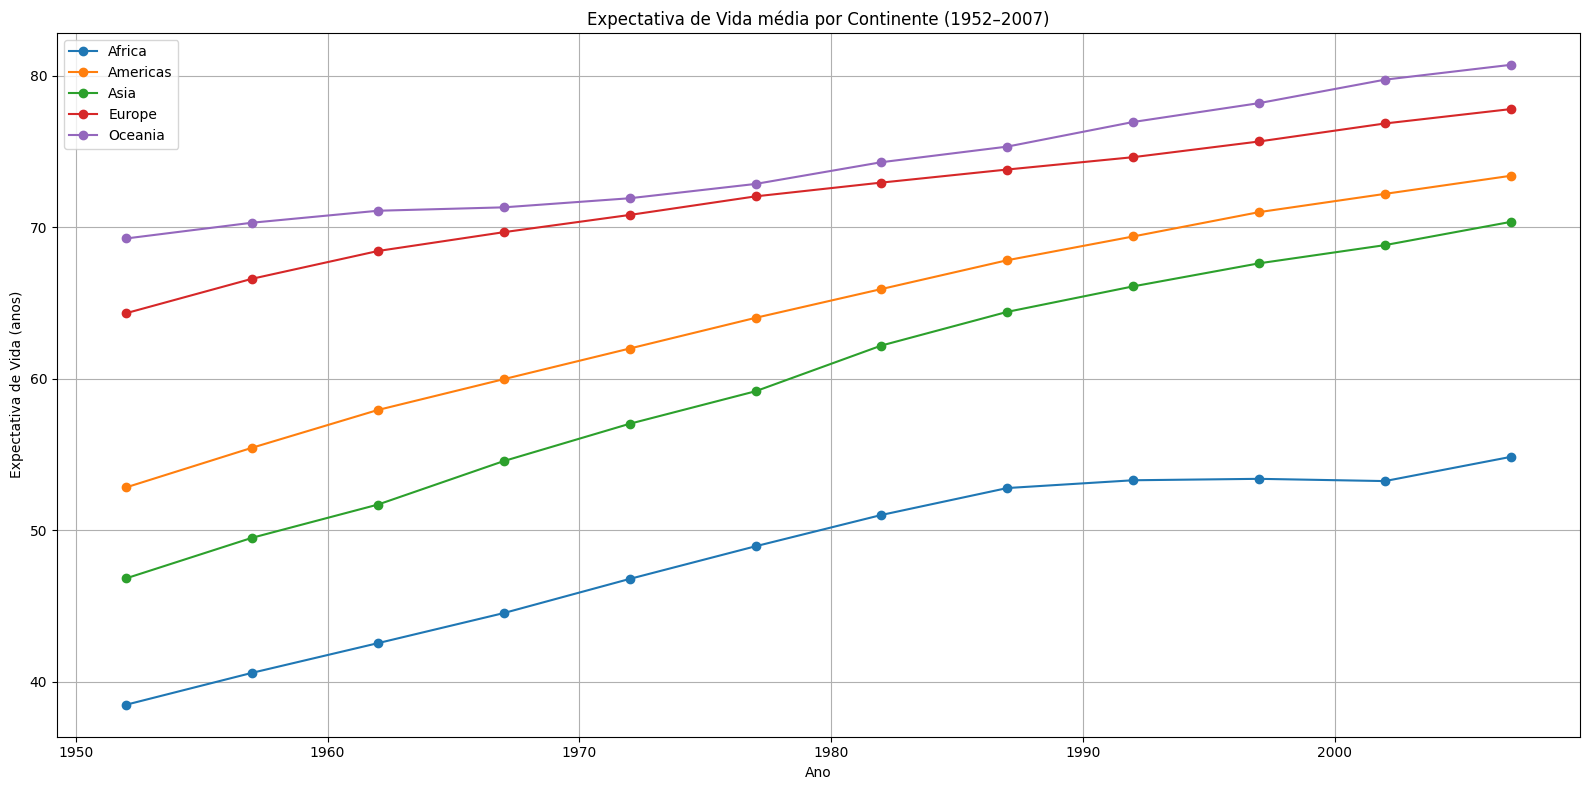

Interpretação: Existem diferenças claras entre continentes; alguns apresentam crescimento mais acentuado e outros partem de patamares mais baixos, evidenciando desigualdades regionais.


In [8]:
# Análise 4

# Cálculo da expectativa de vida média por continente e ano
exp_vida_continente = ds_limpo.groupby(['year','continent'])['lifeExp'].mean().reset_index()

# Plotagem do gráfico de linhas mostrando a expectativa de vida média por continente ao longo dos anos
graficos.plotar_grafico_linhas(exp_vida_continente, 'year', 'lifeExp', 'continent', 'Expectativa de Vida média por Continente (1952–2007)', 'Ano', 'Expectativa de Vida (anos)')

# Interpretação
print('Interpretação: Existem diferenças claras entre continentes; alguns apresentam crescimento mais acentuado e outros partem de patamares mais baixos, evidenciando desigualdades regionais.')

### Análise 5 — PIB per capita por continente

Evolução do PID médio por continente.

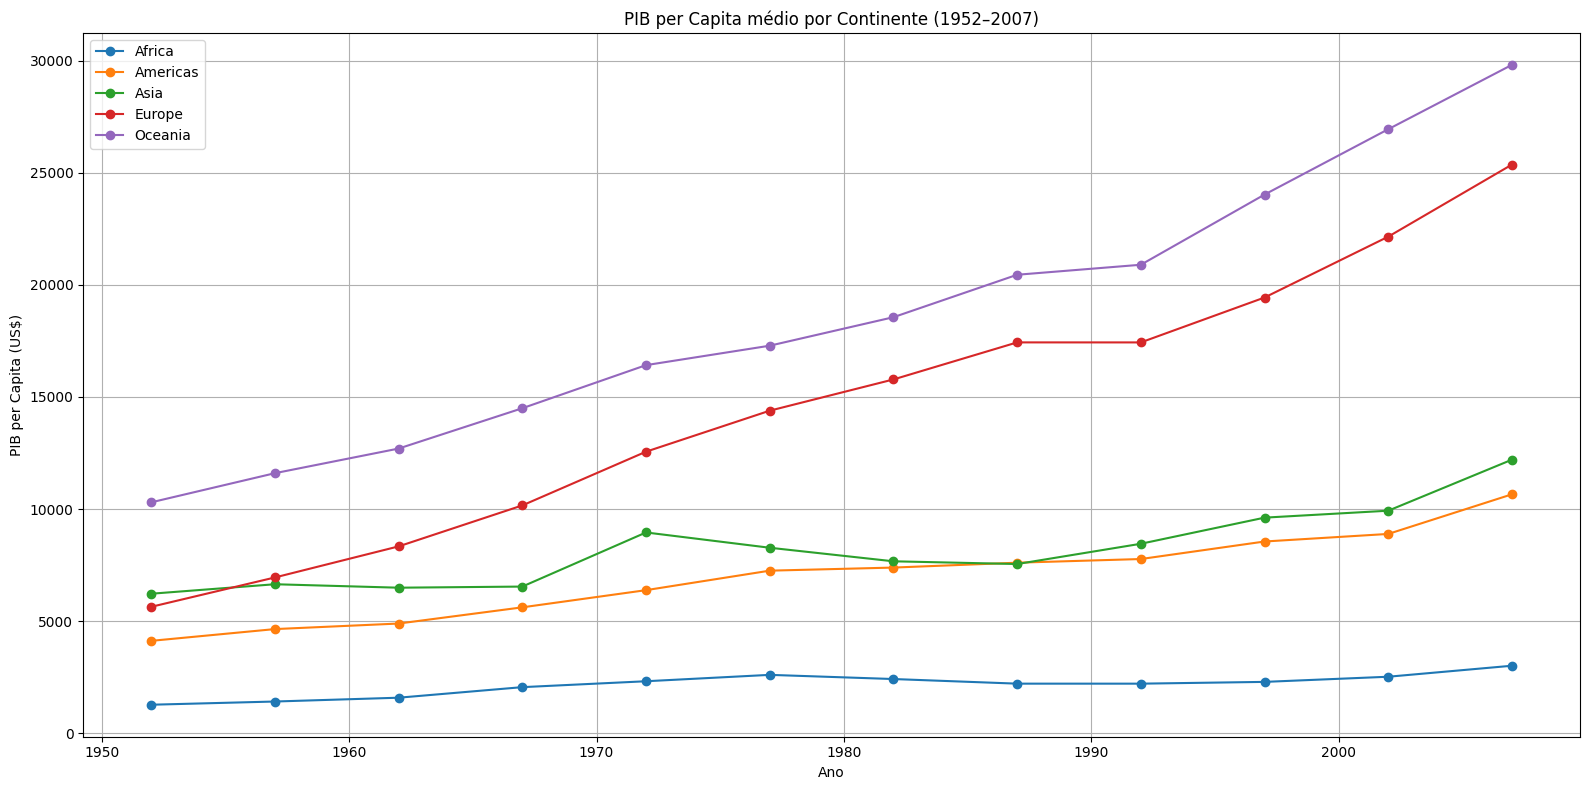

Interpretação: Continua a haver distinções marcantes entre continentes, com alguns apresentando crescimento econômico mais robusto do que outros ao longo do período analisado.


In [9]:
# Análise 5

# Cálculo do PIB per capita médio por continente e ano
pib_continente = ds_limpo.groupby(['year','continent'])['gdpPercap'].mean().reset_index()

# Plotagem do gráfico de linhas mostrando o PIB per capita médio por continente ao longo dos anos
graficos.plotar_grafico_linhas(pib_continente, 'year', 'gdpPercap', 'continent', 'PIB per Capita médio por Continente (1952–2007)', 'Ano', 'PIB per Capita (US$)')

# Interpretação
print('Interpretação: Continua a haver distinções marcantes entre continentes, com alguns apresentando crescimento econômico mais robusto do que outros ao longo do período analisado.')

### Análise 6 — Relação entre expectativa de vida e PIB per capita em 2007

Gráfico de dispersão com bolhas representando a população dos países no ano de 2007.

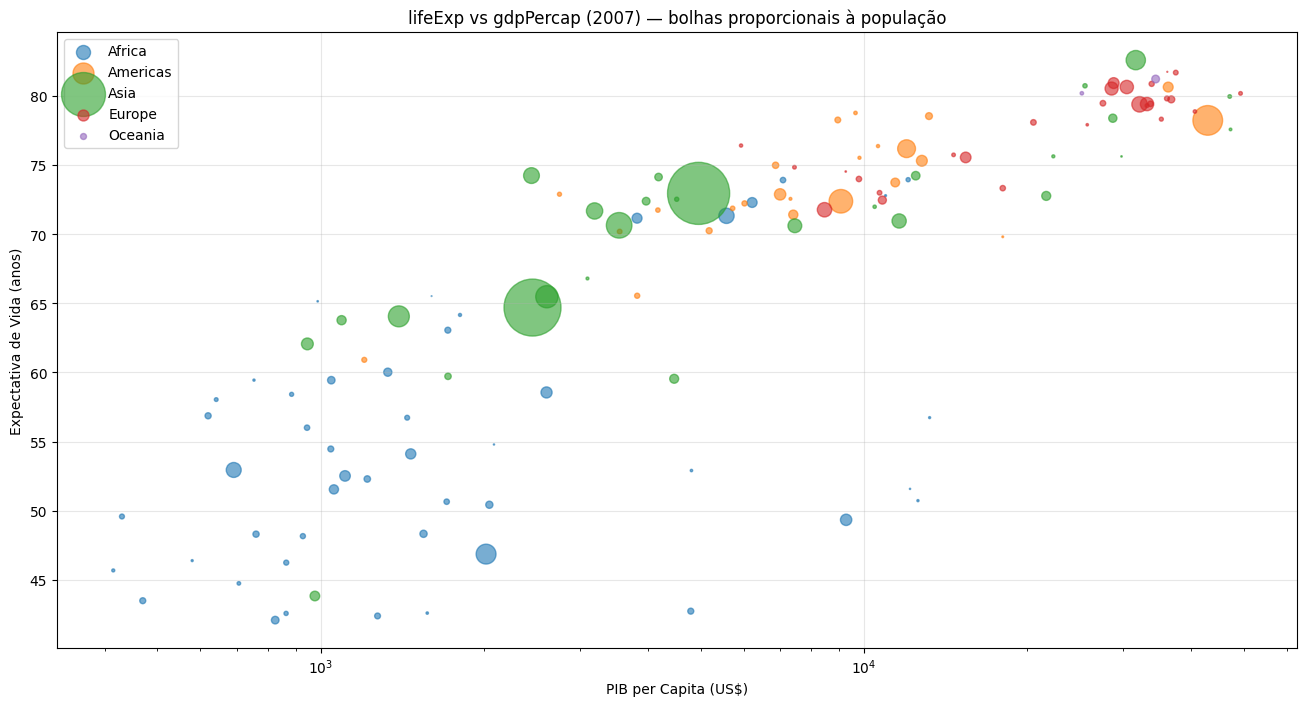

Interpretação: Observa-se correlação positiva entre PIB per capita e expectativa de vida, com países de maior renda apresentando, em geral, maior expectativa de vida. No entanto, há exceções e variações regionais.


In [10]:
# Análise 6

# Filtragem dos dados para o ano de 2007
ds_2007 = ds_limpo[ds_limpo['year']==2007].copy()

# Plotagem do gráfico de dispersão de bolhas para 2007
graficos.plotar_dispersao_bolhas(ds_2007, 'gdpPercap', 'lifeExp', size='pop', hue='continent', title='lifeExp vs gdpPercap (2007) — bolhas proporcionais à população', xlabel='PIB per Capita (US$)', ylabel='Expectativa de Vida (anos)', logx=True)

# Interpretação
print('Interpretação: Observa-se correlação positiva entre PIB per capita e expectativa de vida, com países de maior renda apresentando, em geral, maior expectativa de vida. No entanto, há exceções e variações regionais.')

### Análise 7 — Tendência Global das Emissões de CO₂ per Capita (1952–2007)

Média de emissão global de Co2

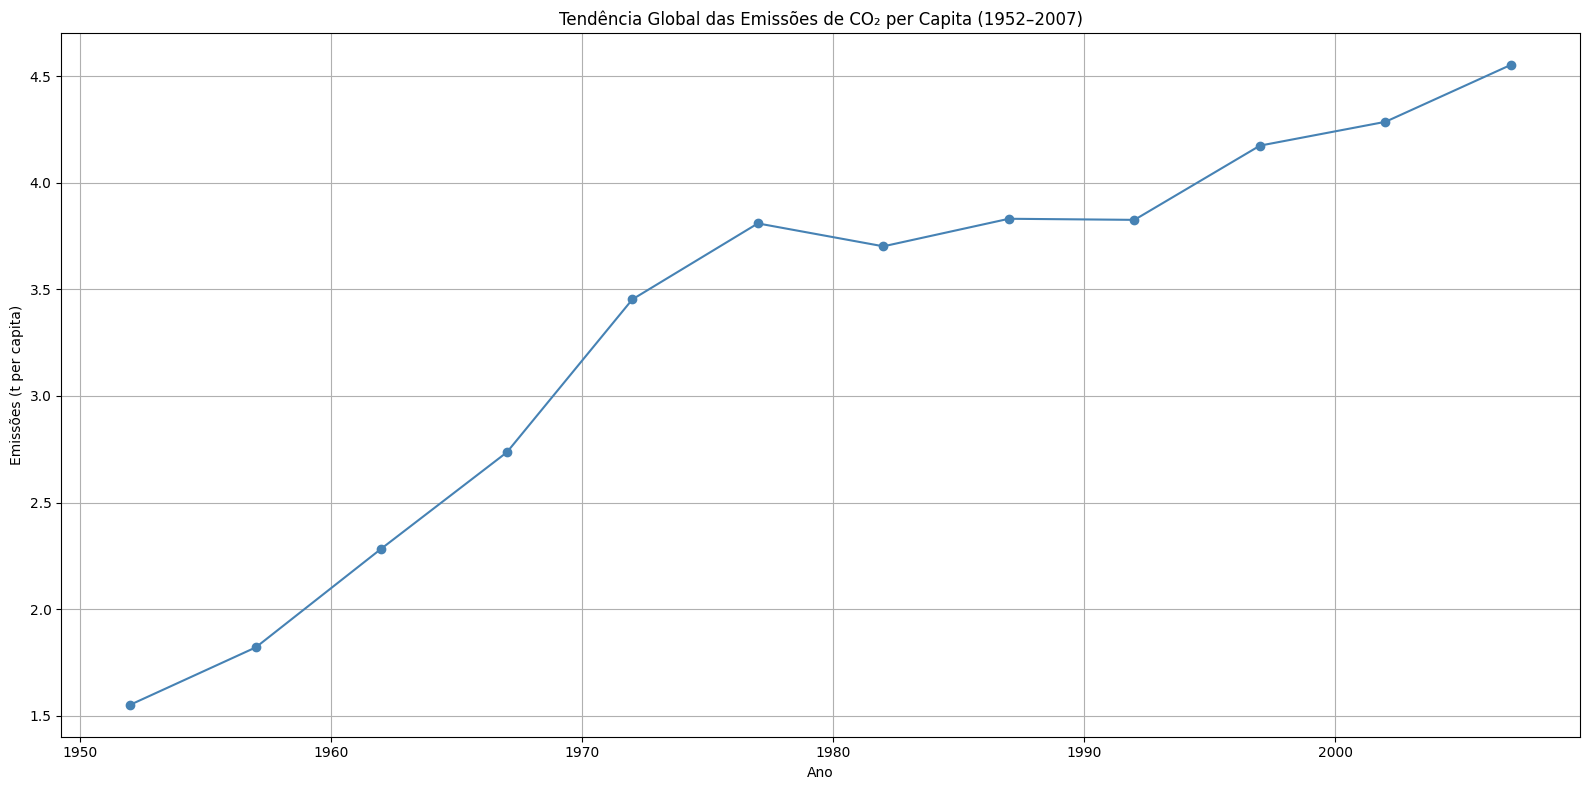

Interpretação: As emissões globais de CO₂ per capita triplicaram entre 1952 e 2007, com crescimento quase contínuo.


In [11]:
# Análise 7

# Cálculo da média global de emissões de CO2 per capita por ano
ds_co2_global = ds_limpo.groupby('year')['co2_per_capita'].mean().reset_index()

#Plotagem do gráfico de linhas mostrando a emissão de co2 global ao longo dos anos
graficos.plotar_grafico_linhas(ds_co2_global, 'year', 'co2_per_capita', None, 'Tendência Global das Emissões de CO₂ per Capita (1952–2007)', 'Ano', 'Emissões (t per capita)')

#Interpretação
print('Interpretação: As emissões globais de CO₂ per capita triplicaram entre 1952 e 2007, com crescimento quase contínuo.')


### Análise 8 — Relação entre PIB per Capita e Emissões de CO₂ per Capita

Grafico de dispeção mostrando a relação entre o PIB e a emissão de CO2

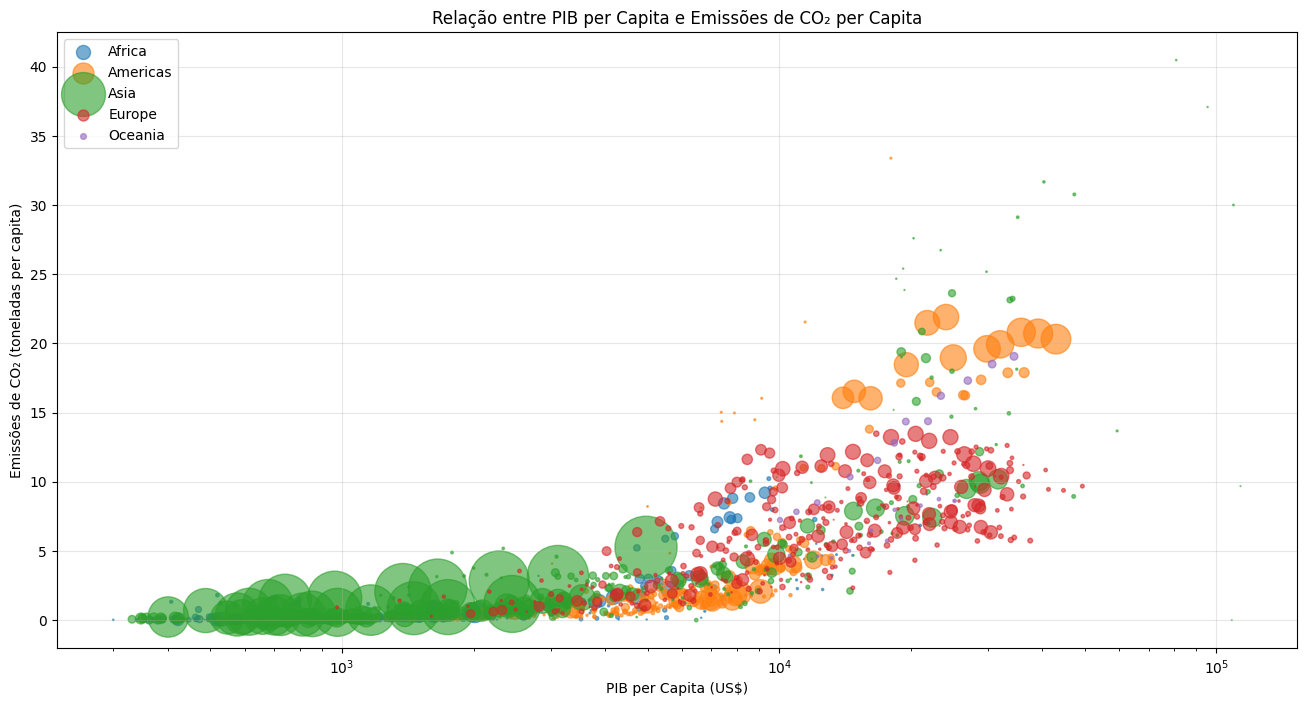

Interpretação: Há uma tendência clara de que países com maior PIB per capita também apresentem maiores emissões de CO₂ per capita, sugerindo uma relação entre desenvolvimento econômico e impacto ambiental.


In [12]:
# Análise 8

#Plotagem do gráfico de dispersão de bolhas para relação entre PIB per Capita e Emissões de CO2 per Capita
graficos.plotar_dispersao_bolhas(ds_limpo, 'gdpPercap', 'co2_per_capita', size='pop', hue='continent', title='Relação entre PIB per Capita e Emissões de CO₂ per Capita', xlabel='PIB per Capita (US$)', ylabel='Emissões de CO₂ (toneladas per capita)', logx=True)

#Interpretação
print('Interpretação: Há uma tendência clara de que países com maior PIB per capita também apresentem maiores emissões de CO₂ per capita, sugerindo uma relação entre desenvolvimento econômico e impacto ambiental.')

### Análise 9 — Correlações entre variáveis (2007 e todas as observações)

Cálculo das correlações entre expectativa de vida, PIP e população

In [13]:
# Análise 9

# Cálculo das correlações entre expectativa de vida, PIP e população
corr_2007 = ds_2007[['lifeExp','gdpPercap','pop']].corr()

# Cálculo das correlações para todas as observações
corr_completa = ds_limpo[['lifeExp','gdpPercap','pop', 'co2_per_capita' ]].corr()


print('Correlação (2007):\n', corr_2007.round(3))
print('\nCorrelação (todas as observações):\n', corr_completa.round(3))

Correlação (2007):
            lifeExp  gdpPercap    pop
lifeExp      1.000      0.680  0.054
gdpPercap    0.680      1.000 -0.056
pop          0.054     -0.056  1.000

Correlação (todas as observações):
                 lifeExp  gdpPercap    pop  co2_per_capita
lifeExp           1.000      0.575  0.065           0.578
gdpPercap         0.575      1.000 -0.031           0.771
pop               0.065     -0.031  1.000           0.011
co2_per_capita    0.578      0.771  0.011           1.000


### Análise 10 — Distribuição da população por continente ao longo do tempo

Análise da evolução da distribuição populacional entre continentes.


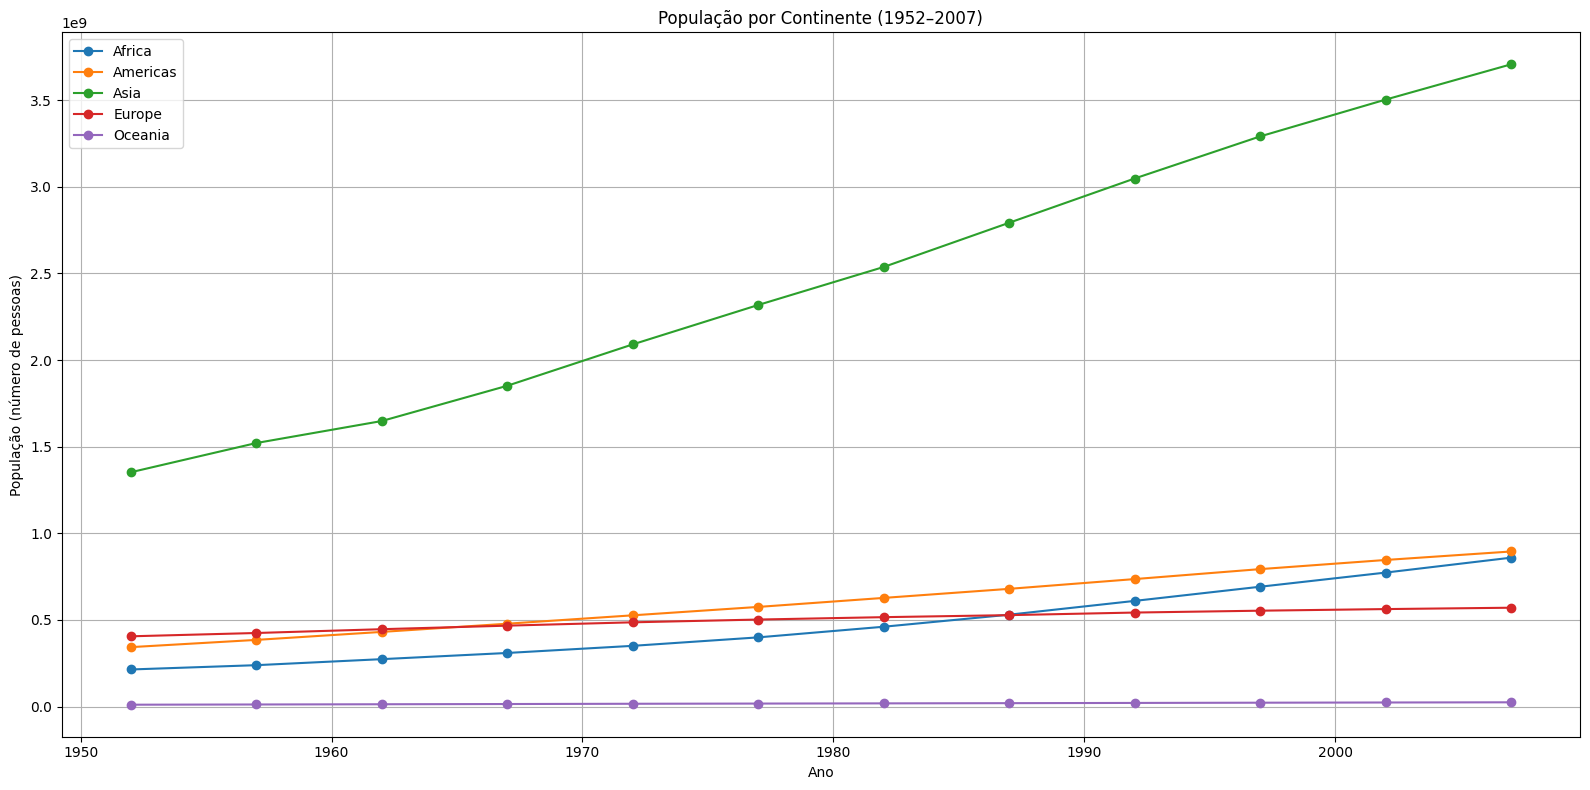

Interpretação: A Ásia domina em termos de população total, seguida pela África e Américas. Observa-se crescimento populacional em todos os continentes, com ritmos diferentes.


In [14]:
# Análise 10

# Cálculo da população total por continente e ano
pop_continente = ds_limpo.groupby(['year', 'continent'])['pop'].sum().reset_index()

# Plotagem do gráfico de linhas mostrando a população por continente ao longo dos anos
graficos.plotar_grafico_linhas(pop_continente, 'year', 'pop', 'continent', 'População por Continente (1952–2007)', 'Ano', 'População (número de pessoas)')

# Interpretação
print('Interpretação: A Ásia domina em termos de população total, seguida pela África e Américas. Observa-se crescimento populacional em todos os continentes, com ritmos diferentes.')


### Análise 11 — Top 10 países com maior PIB per capita em 2007

Identificação dos países com maior riqueza per capita no ano final do estudo.


Top 10 países com maior PIB per capita em 2007:


,country,continent,gdpPercap,lifeExp,pop
1043,Norway,Europe,49357.19,80.20,4627926.0
775,Kuwait,Asia,47306.99,77.59,2505559.0
1232,Singapore,Asia,47143.18,79.97,4553009.0
1460,United States,Americas,42951.65,78.24,301139947.0
691,Ireland,Europe,40676.00,78.89,4109086.0
1328,Switzerland,Europe,37506.42,81.70,7554661.0
983,Netherlands,Europe,36797.93,79.76,16570613.0
246,Canada,Americas,36319.24,80.65,33390141.0
631,Iceland,Europe,36180.79,81.76,301931.0
83,Austria,Europe,36126.49,79.83,8199783.0


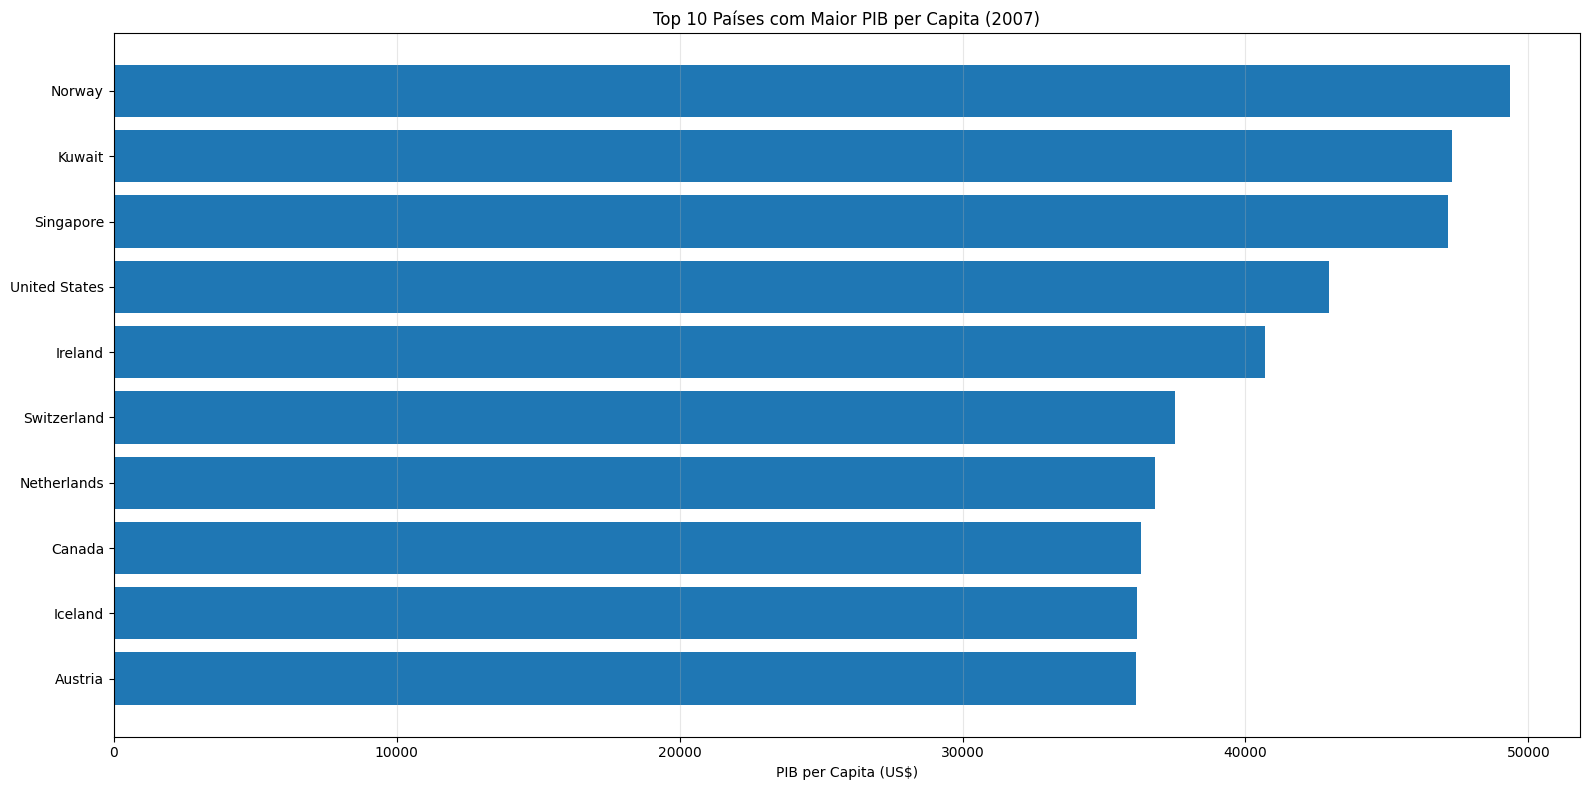

Interpretação: Noruega lidera com o maior PIB per capita, seguida por países europeus e asiáticos desenvolvidos. Observa-se concentração de riqueza em países desenvolvidos.


In [15]:
# Análise 11

# Top 10 países com maior PIB per capita em 2007
top10_pib_2007 = ds_2007.nlargest(10, 'gdpPercap')[['country', 'continent', 'gdpPercap', 'lifeExp', 'pop']].round(2)

print("Top 10 países com maior PIB per capita em 2007:")
display(top10_pib_2007)

# Gráfico de barras horizontais usando função modularizada
graficos.plotar_barras_horizontais(top10_pib_2007, 'gdpPercap', 'country', 
                                  'Top 10 Países com Maior PIB per Capita (2007)', 
                                  'PIB per Capita (US$)')

# Interpretação
print('Interpretação: Noruega lidera com o maior PIB per capita, seguida por países europeus e asiáticos desenvolvidos. Observa-se concentração de riqueza em países desenvolvidos.')


### Análise 12 — Top 10 países com maior expectativa de vida em 2007

Identificação dos países com melhor qualidade de vida em termos de longevidade.


Top 10 países com maior expectativa de vida em 2007:


,country,continent,lifeExp,gdpPercap,pop
739,Japan,Asia,82.60,31656.07,127467972.0
631,Iceland,Europe,81.76,36180.79,301931.0
1328,Switzerland,Europe,81.70,37506.42,7554661.0
71,Australia,Oceania,81.24,34435.37,20434176.0
1280,Spain,Europe,80.94,28821.06,40448191.0
1316,Sweden,Europe,80.88,33859.75,9031088.0
703,Israel,Asia,80.74,25523.28,6426679.0
487,France,Europe,80.66,30470.02,61083916.0
246,Canada,Americas,80.65,36319.24,33390141.0
715,Italy,Europe,80.55,28569.72,58147733.0


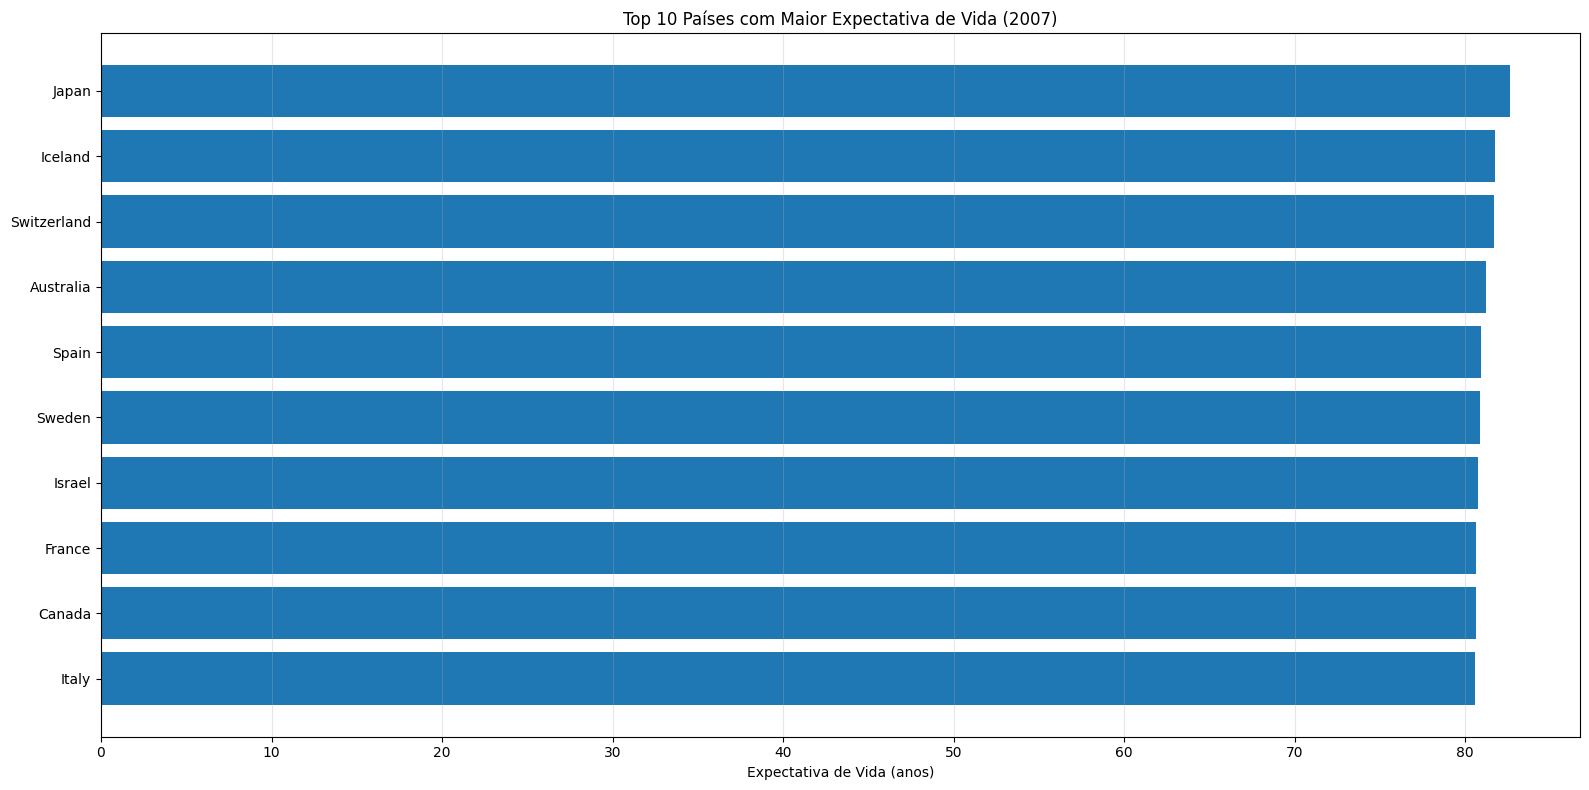

Interpretação: Japão lidera com a maior expectativa de vida, seguido por países europeus e asiáticos. Países desenvolvidos dominam o ranking, refletindo melhor acesso à saúde e qualidade de vida.


In [16]:
# Análise 12

# Top 10 países com maior expectativa de vida em 2007
top10_lifeExp_2007 = ds_2007.nlargest(10, 'lifeExp')[['country', 'continent', 'lifeExp', 'gdpPercap', 'pop']].round(2)

print("Top 10 países com maior expectativa de vida em 2007:")
display(top10_lifeExp_2007)

# Gráfico de barras horizontais usando função modularizada
graficos.plotar_barras_horizontais(top10_lifeExp_2007, 'lifeExp', 'country', 
                                  'Top 10 Países com Maior Expectativa de Vida (2007)', 
                                  'Expectativa de Vida (anos)')

# Interpretação
print('Interpretação: Japão lidera com a maior expectativa de vida, seguido por países europeus e asiáticos. Países desenvolvidos dominam o ranking, refletindo melhor acesso à saúde e qualidade de vida.')


### Análise 13 — Relação entre expectativa de vida e emissões de CO₂ per capita

Análise da correlação entre qualidade de vida e impacto ambiental.


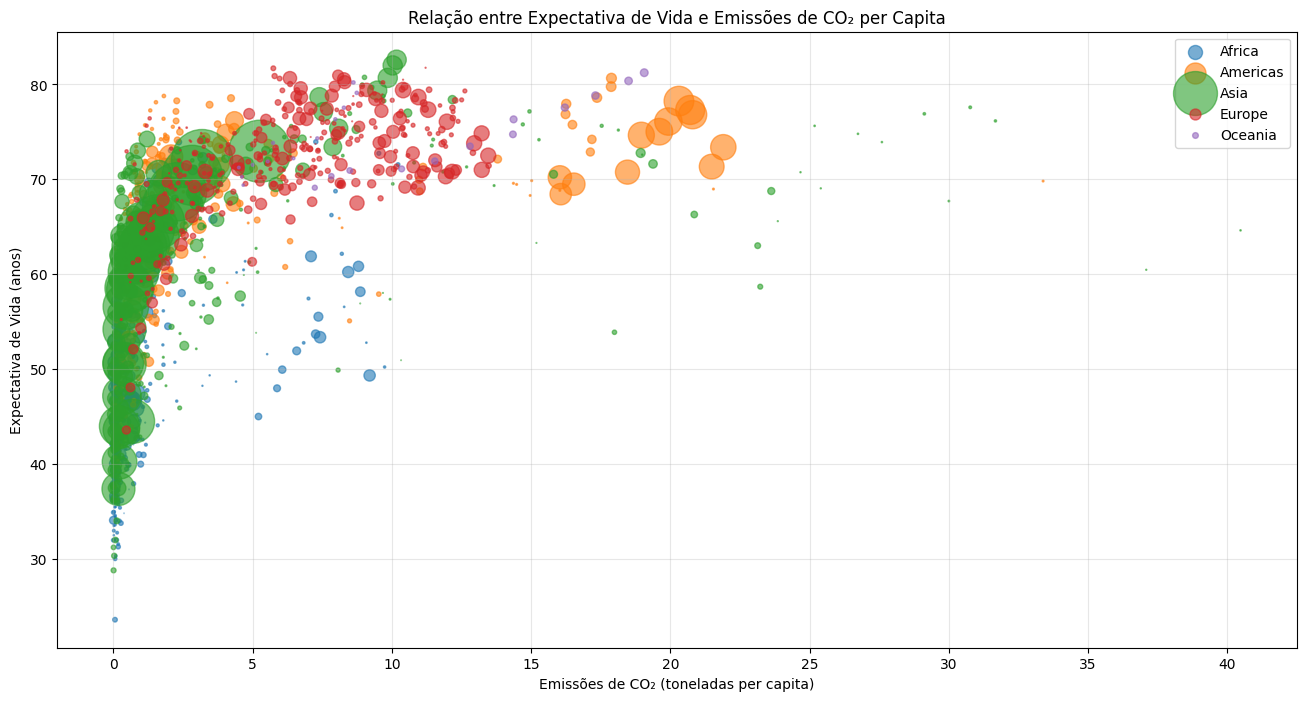

Correlação entre expectativa de vida e emissões de CO2: 0.578
Interpretação: Existe uma correlação positiva moderada entre expectativa de vida e emissões de CO2, sugerindo que países com maior desenvolvimento econômico têm tanto maior longevidade quanto maior impacto ambiental.


In [17]:
# Análise 13

# Gráfico de dispersão entre expectativa de vida e emissões de CO2 per capita
graficos.plotar_dispersao_bolhas(ds_limpo, 'co2_per_capita', 'lifeExp', size='pop', hue='continent', 
                                title='Relação entre Expectativa de Vida e Emissões de CO₂ per Capita', 
                                xlabel='Emissões de CO₂ (toneladas per capita)', 
                                ylabel='Expectativa de Vida (anos)')

# Cálculo da correlação específica
corr_lifeExp_co2 = ds_limpo[['lifeExp', 'co2_per_capita']].corr().iloc[0,1]
print(f'Correlação entre expectativa de vida e emissões de CO2: {corr_lifeExp_co2:.3f}')

# Interpretação
print('Interpretação: Existe uma correlação positiva moderada entre expectativa de vida e emissões de CO2, sugerindo que países com maior desenvolvimento econômico têm tanto maior longevidade quanto maior impacto ambiental.')


### Análise 14 — Evolução das emissões de CO₂ por continente

Análise temporal das emissões de CO2 per capita por região geográfica.


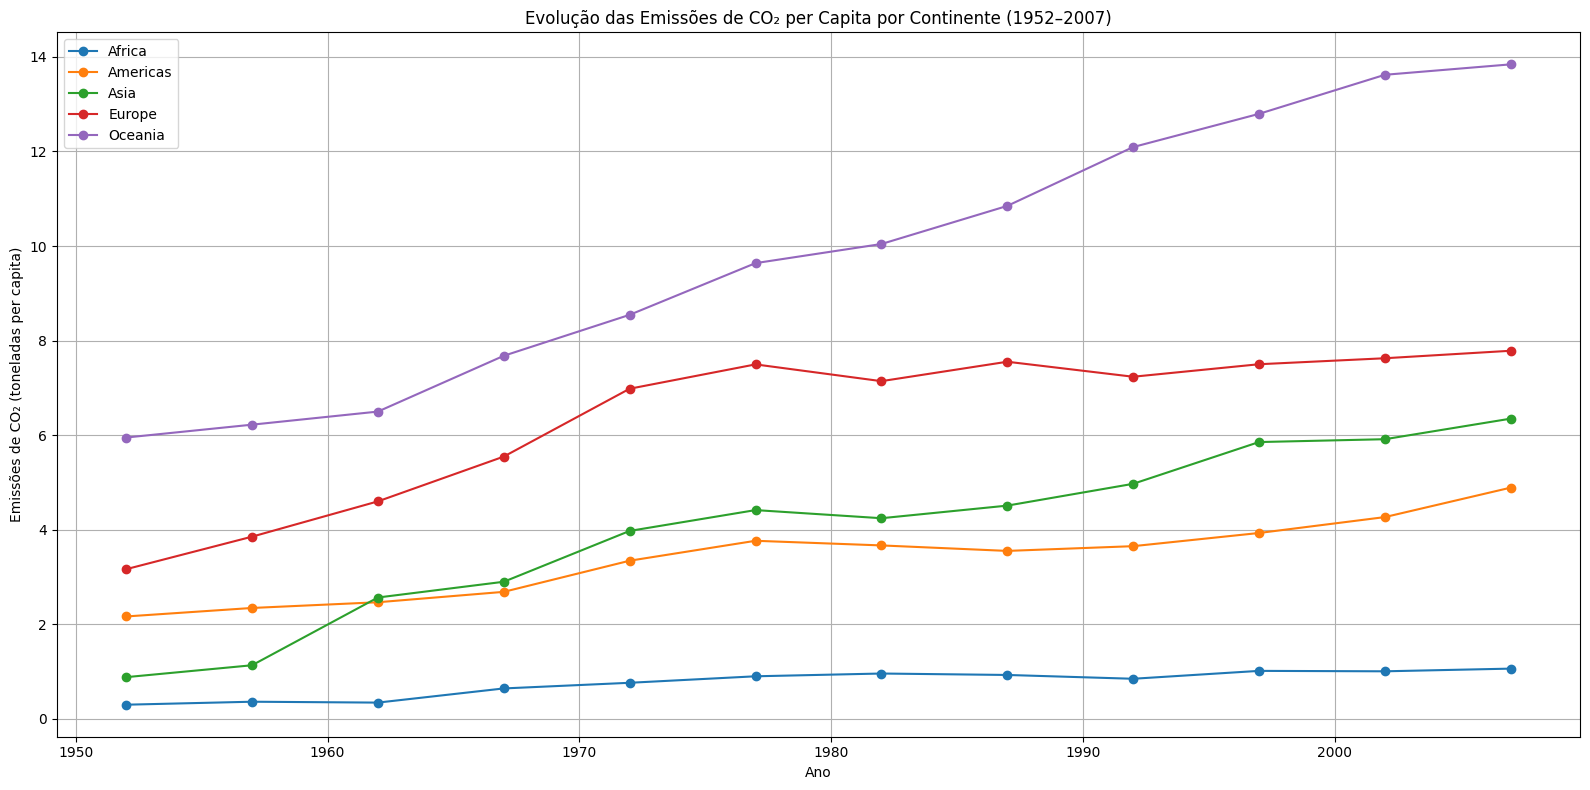

Interpretação: Europa e Américas apresentam as maiores emissões per capita, enquanto África e Ásia têm valores menores. Observa-se crescimento das emissões em todos os continentes ao longo do tempo.


In [18]:
# Análise 14

# Cálculo das emissões médias de CO2 per capita por continente e ano
co2_continente = ds_limpo.groupby(['year', 'continent'])['co2_per_capita'].mean().reset_index()

# Plotagem do gráfico de linhas mostrando as emissões de CO2 por continente ao longo dos anos
graficos.plotar_grafico_linhas(co2_continente, 'year', 'co2_per_capita', 'continent', 
                              'Evolução das Emissões de CO₂ per Capita por Continente (1952–2007)', 
                              'Ano', 'Emissões de CO₂ (toneladas per capita)')

# Interpretação
print('Interpretação: Europa e Américas apresentam as maiores emissões per capita, enquanto África e Ásia têm valores menores. Observa-se crescimento das emissões em todos os continentes ao longo do tempo.')


### Análise 15 — Análise de outliers e países com comportamento atípico

Identificação de países que se destacam por características excepcionais ou comportamentos únicos.


In [19]:
# Análise 15

# Identificação de outliers usando método IQR para PIB per capita em 2007
Q1 = ds_2007['gdpPercap'].quantile(0.25)
Q3 = ds_2007['gdpPercap'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_pib = ds_2007[(ds_2007['gdpPercap'] < limite_inferior) | (ds_2007['gdpPercap'] > limite_superior)]
print("Países outliers em PIB per capita (2007):")
display(outliers_pib[['country', 'continent', 'gdpPercap', 'lifeExp']].round(2))

# Identificação de países com alta expectativa de vida mas baixo PIB (eficientes)
eficientes = ds_2007[(ds_2007['lifeExp'] > ds_2007['lifeExp'].quantile(0.8)) & 
                     (ds_2007['gdpPercap'] < ds_2007['gdpPercap'].quantile(0.5))]
print("\nPaíses com alta expectativa de vida e baixo PIB (eficientes):")
display(eficientes[['country', 'continent', 'lifeExp', 'gdpPercap']].round(2))

# Identificação de países com baixa expectativa de vida mas alto PIB (ineficientes)
ineficientes = ds_2007[(ds_2007['lifeExp'] < ds_2007['lifeExp'].quantile(0.2)) & 
                       (ds_2007['gdpPercap'] > ds_2007['gdpPercap'].quantile(0.5))]
print("\nPaíses com baixa expectativa de vida e alto PIB (ineficientes):")
display(ineficientes[['country', 'continent', 'lifeExp', 'gdpPercap']].round(2))

# Interpretação
print('\nInterpretação: Identificamos países outliers que fogem dos padrões esperados, incluindo países muito ricos (como Luxemburgo), países eficientes em saúde (como Cuba) e casos que merecem investigação mais aprofundada.')


Países outliers em PIB per capita (2007):


,country,continent,gdpPercap,lifeExp
83,Austria,Europe,36126.49,79.83
246,Canada,Americas,36319.24,80.65
631,Iceland,Europe,36180.79,81.76
691,Ireland,Europe,40676.00,78.89
775,Kuwait,Asia,47306.99,77.59
983,Netherlands,Europe,36797.93,79.76
1043,Norway,Europe,49357.19,80.20
1232,Singapore,Asia,47143.18,79.97
1328,Switzerland,Europe,37506.42,81.70
1460,United States,Americas,42951.65,78.24



Países com alta expectativa de vida e baixo PIB (eficientes):


,country,continent,lifeExp,gdpPercap



Países com baixa expectativa de vida e alto PIB (ineficientes):


,country,continent,lifeExp,gdpPercap
163,Botswana,Africa,50.73,12569.85
448,Equatorial Guinea,Africa,51.58,12154.09
1268,South Africa,Africa,49.34,9269.66



Interpretação: Identificamos países outliers que fogem dos padrões esperados, incluindo países muito ricos (como Luxemburgo), países eficientes em saúde (como Cuba) e casos que merecem investigação mais aprofundada.


## 6. Conclusão e Reflexão



